# 선형 회귀 분석의 필요 가정

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

## 비선형 패턴

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/happiness_age.xlsx', engine = 'openpyxl')
df.head()
# 행복, 연령

,Happiness,Age
0,62,49
1,66,51
2,67,41
3,71,65
4,87,84


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Happiness  24 non-null     int64
 1   Age        24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


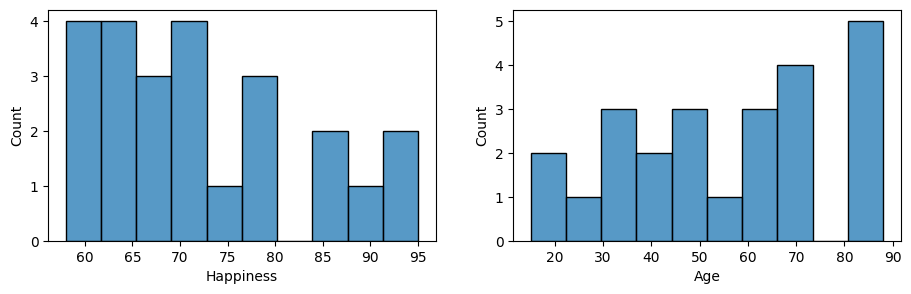

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(data = df, x = 'Happiness', bins = 10, ax = ax1)
sns.histplot(data = df, x = 'Age', bins = 10, ax = ax2)
plt.show()

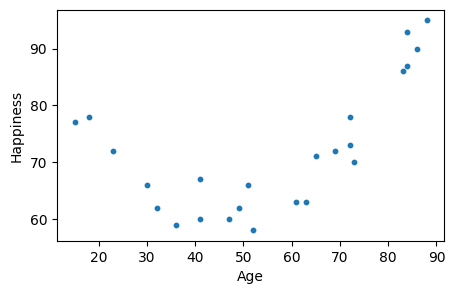

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'Age',
        y = 'Happiness',
        s = 10,
        figsize = (5,3))
plt.show()

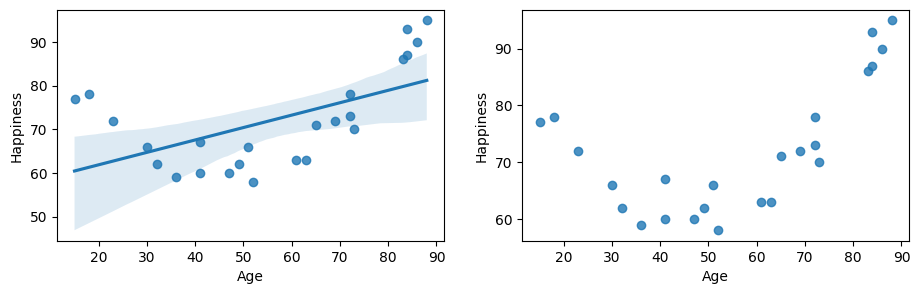

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'Age', y = 'Happiness', data = df, ax = ax1)
sns.regplot(x = 'Age', y = 'Happiness', data = df, fit_reg = False, ax = ax2)
plt.show()

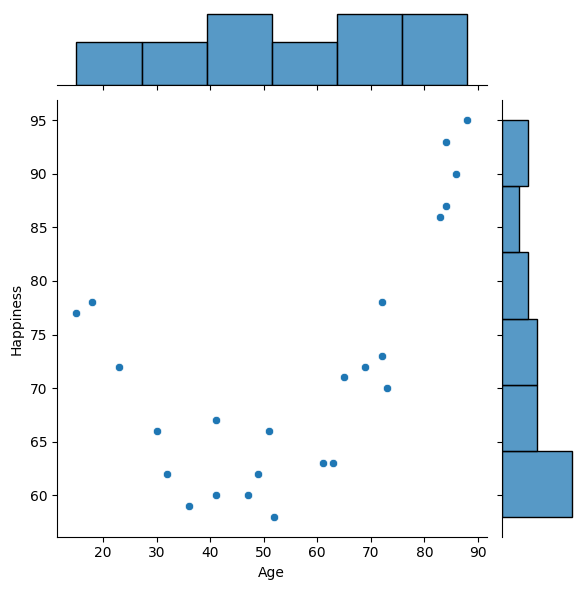

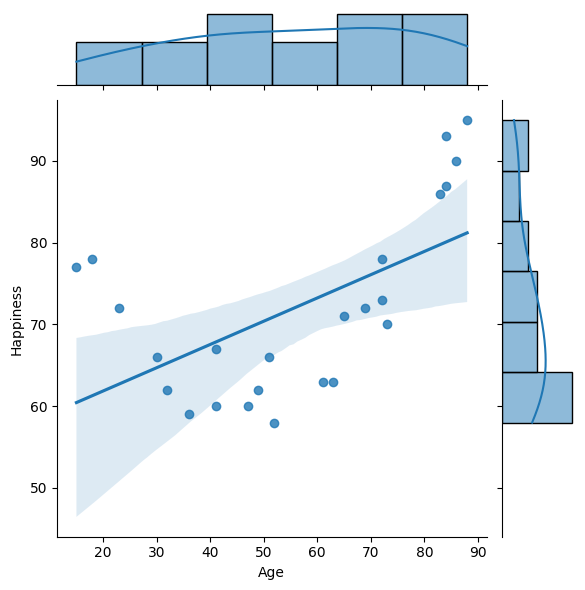

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Age', y = 'Happiness', data = df)
sns.jointplot(x = 'Age', y = 'Happiness', kind = 'reg', data = df)
plt.show()

In [ ]:
# 전체 데이터
X = df[['Age']]
y = df['Happiness']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (24, 1)
y 데이터:  (24,)


In [ ]:
# 단순선형회귀모델
from sklearn.linear_model import LinearRegression
sr = LinearRegression()
# 모델 훈련
sr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(sr.score(X, y))
r2 = round(sr.score(X, y),2)
print(r2)

0.3266867640574236
0.33


In [ ]:
# 계수 = 모델 파라미터
# 절편
print(sr.intercept_)
intercept = round(sr.intercept_,2)
print(intercept)

56.1771717193064
56.18


In [ ]:
# 기울기
print(sr.coef_)
slope = round(sr.coef_[0],2)
print(slope)

[0.2845]
0.28


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept) + " + " + str(slope) + " * Age"
equation

'y_hat = 56.18 + 0.28 * Age'

In [ ]:
# 결정계수
rsquared = "R squared = " + str(r2)
rsquared

'R squared = 0.33'

In [ ]:
y_pred = sr.predict(X)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred)))
print(mean_absolute_error(y, y_pred))

9.066439445632605
9.066439445632605
7.865901638189432


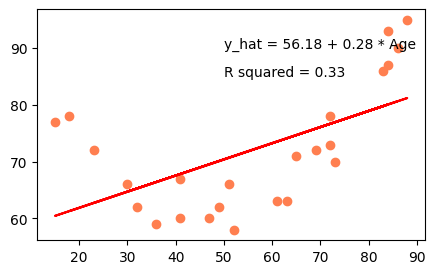

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X, y, 'o', color = 'coral')
plt.plot(X, y_pred, color = 'red')
plt.text(50, 90, equation)
plt.text(50, 85, rsquared)
plt.show()

In [ ]:
# 잔차도
# 잔차
residuals = y - y_pred;residuals

0     -8.115483
1     -4.684394
2     -0.839841
3     -3.666769
4      6.928580
5     -7.839841
6      6.213035
7     16.702632
8     -7.417564
9    -10.528947
10    16.555998
11     9.359669
12    -6.942412
13    -3.279743
14    12.928580
15     9.280355
16   -12.968849
17    -3.657956
18   -11.097858
19     1.289168
20     1.342044
21    -9.546573
22    13.790758
23    -3.804590
Name: Happiness, dtype: float64

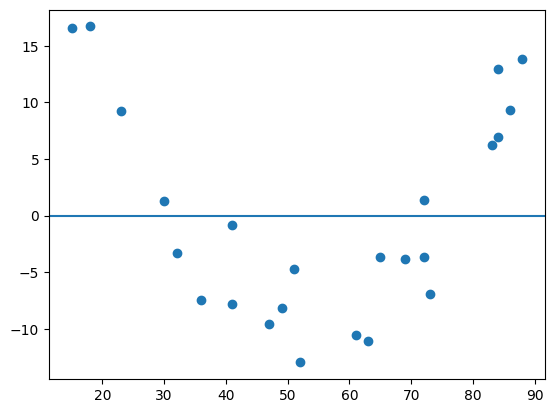

In [ ]:
plt.plot(X, residuals, 'o')
plt.axhline(y = 0)
plt.show()
# 나이에 대한 잔차도

## 다중공선성

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/home_values.xlsx', engine = 'openpyxl')
df.head()
# 중앙주택가치, 중앙가계소득, 1인당 소득, 주택소유비율

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
0,Alabama,117600,42081,22984,71.1
1,Alaska,229100,66521,30726,64.7
2,Arizona,215000,50448,25680,67.4
3,Arkansas,102300,39267,21274,67.7
4,California,458500,60883,29188,57.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Home Value     51 non-null     int64  
 2   HH Inc         51 non-null     int64  
 3   Per Cap Inc    51 non-null     int64  
 4   Pct Owner Occ  51 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [ ]:
# 전체 데이터
X = df.loc[:,'HH Inc':'Pct Owner Occ']
y = df['Home Value']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (51, 3)
y 데이터:  (51,)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(mr.score(X, y))
r2 = round(mr.score(X, y),2)
print(r2)

0.8187030771423148
0.82


In [ ]:
# 계수 = 모델 파라미터
# 절편
print(mr.intercept_)
intercept = round(mr.intercept_,2)
print(intercept)

417892.04437147453
417892.04


In [ ]:
# 기울기
print(mr.coef_)
slope = [round(x, 2) for x in mr.coef_]
print(slope)

[    9.0391    -3.2736 -8744.2953]
[9.04, -3.27, -8744.3]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

HH Inc: 9.04
Per Cap Inc: -3.27
Pct Owner Occ: -8744.3


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 417892.04 + 9.04 * HH Inc + -3.27 * Per Cap Inc + -8744.3 * Pct Owner Occ


In [ ]:
# 결정계수
rsquared = "R squared = " + str(r2)
rsquared

'R squared = 0.82'

In [ ]:
df.columns

Index(['State', 'Home Value', 'HH Inc', 'Per Cap Inc', 'Pct Owner Occ'], dtype='object')

In [ ]:
df_new = df.copy()
df_new.columns = [i.replace(" ", "_") for i in list(df_new.columns)]
df_new.columns

Index(['State', 'Home_Value', 'HH_Inc', 'Per_Cap_Inc', 'Pct_Owner_Occ'], dtype='object')

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols('Home_Value ~ HH_Inc + Per_Cap_Inc + Pct_Owner_Occ', df_new)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Home_Value   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     70.75
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.89e-17
Time:                        01:10:14   Log-Likelihood:                -614.83
No. Observations:                  51   AIC:                             1238.
Df Residuals:                      47   BIC:                             1245.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.179e+05   1.24e+05      3.380

In [ ]:
X.corr()

,HH Inc,Per Cap Inc,Pct Owner Occ
HH Inc,1.000000,0.858159,-0.339409
Per Cap Inc,0.858159,1.000000,-0.531749
Pct Owner Occ,-0.339409,-0.531749,1.000000


In [ ]:
from scipy.stats import pearsonr
pearsonr(X['HH Inc'], X['Per Cap Inc'])[0]

0.8581589075501166

In [ ]:
# 다중공선성 의심
# 분산팽창지수 VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF"] = [round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])]
vif_df.sort_values(by = 'VIF')

,features,VIF
2,Pct Owner Occ,25.72
1,Per Cap Inc,143.42
0,HH Inc,159.14


In [ ]:
# 모델 수정 = 변수 선택
model = smf.ols('Home_Value ~ HH_Inc + Pct_Owner_Occ', df_new)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Home_Value   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.71e-18
Time:                        01:18:43   Log-Likelihood:                -615.40
No. Observations:                  51   AIC:                             1237.
Df Residuals:                      48   BIC:                             1243.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.482e+05   1.03e+05      3.364

In [ ]:
model = smf.ols('Home_Value ~ Per_Cap_Inc + Pct_Owner_Occ', df_new)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Home_Value   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     49.98
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.84e-12
Time:                        01:18:52   Log-Likelihood:                -629.67
No. Observations:                  51   AIC:                             1265.
Df Residuals:                      48   BIC:                             1271.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.856e+05   1.61e+05      1.773

### 예측 성능이 더 중요하다면?

In [ ]:
X.head()

,HH Inc,Per Cap Inc,Pct Owner Occ
0,42081,22984,71.1
1,66521,30726,64.7
2,50448,25680,67.4
3,39267,21274,67.7
4,60883,29188,57.4


In [ ]:
# 모델 수정 = 변수 선택
X1 = X.iloc[:,[0, 2]]
X2 = X.iloc[:,[1, 2]]
X3 = X

In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)
m3 = LinearRegression();m3.fit(X3, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)
m3_r2 = m3.score(X3, y);print(m3_r2)

0.8146202822416595
0.6756036475270669
0.8187030771423148


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)
m3_ar2 = 1 - (1 - m3_r2) * ((len(X) - 1)/(len(X) - X3.shape[1] - 1));print(m3_ar2)

0.806896127335062
0.6620871328406948
0.8071309331301222


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)
intercept3 = round(m3.intercept_, 5);print(intercept3)

348187.14118
285604.08313
417892.04437


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)
slope3 = [round(x, 4) for x in m3.coef_];print(slope3)

[7.7403, -8027.8959]
[13.2132, -6454.0762]
[9.0391, -3.2736, -8744.2953]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X3.columns, slope3):
  print("{}: {}".format(name, coef))

HH Inc: 7.7403
Pct Owner Occ: -8027.8959

Per Cap Inc: 13.2132
Pct Owner Occ: -6454.0762

HH Inc: 9.0391
Per Cap Inc: -3.2736
Pct Owner Occ: -8744.2953


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)
equation3 = "y_hat = " + str(intercept3)
for coef, name in zip(slope3, X3.columns):
  equation3 += " + {} * {}".format(coef, name)
print(equation3)

y_hat = 348187.14118 + 7.7403 * HH Inc + -8027.8959 * Pct Owner Occ
y_hat = 285604.08313 + 13.2132 * Per Cap Inc + -6454.0762 * Pct Owner Occ
y_hat = 417892.04437 + 9.0391 * HH Inc + -3.2736 * Per Cap Inc + -8744.2953 * Pct Owner Occ


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)
y_pred3 = m3.predict(X3)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("model1: ")
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print("model2: ")
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))
print("model3: ")
print(mean_squared_error(y, y_pred3, squared = False))
print(mean_absolute_error(y, y_pred3))

model1: 
42097.181992391445
30144.250387059496
model2: 
55687.77906900382
37182.666541518156
model3: 
41631.027803384684
30160.34681673641


## 변화하는 변동성

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/convenience_stores.xlsx', engine = 'openpyxl')
df.head()
# 편의점 매출액, 편의점 크기

,Sales,Sqft
0,140,1810
1,160,2500
2,80,1010
3,180,2170
4,140,2310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   40 non-null     int64
 1   Sqft    40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


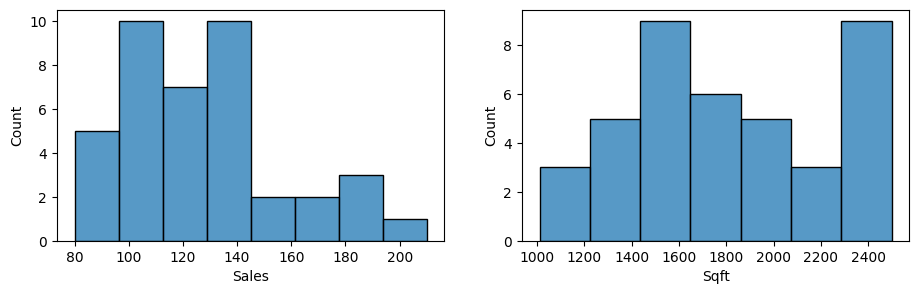

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['Sales'], ax = ax1)
sns.histplot(df['Sqft'], ax = ax2)
plt.show()

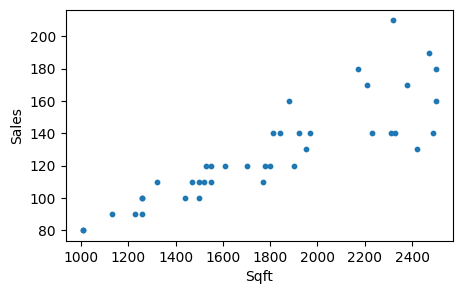

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'Sqft',
        y = 'Sales',
        s = 10,
        figsize = (5,3))
plt.show()

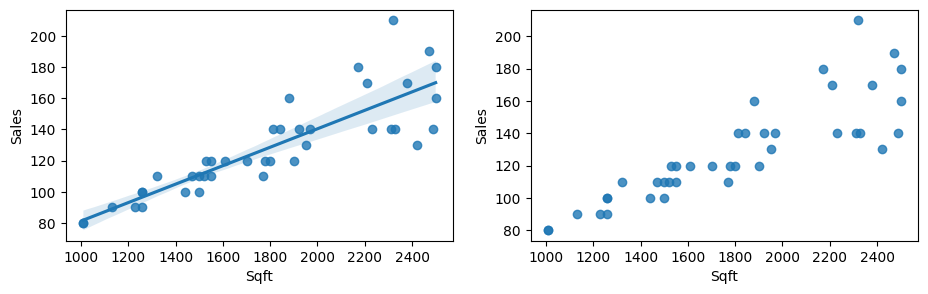

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'Sqft', y = 'Sales', data = df, ax = ax1)
sns.regplot(x = 'Sqft', y = 'Sales', data = df, fit_reg = False, ax = ax2)
plt.show()

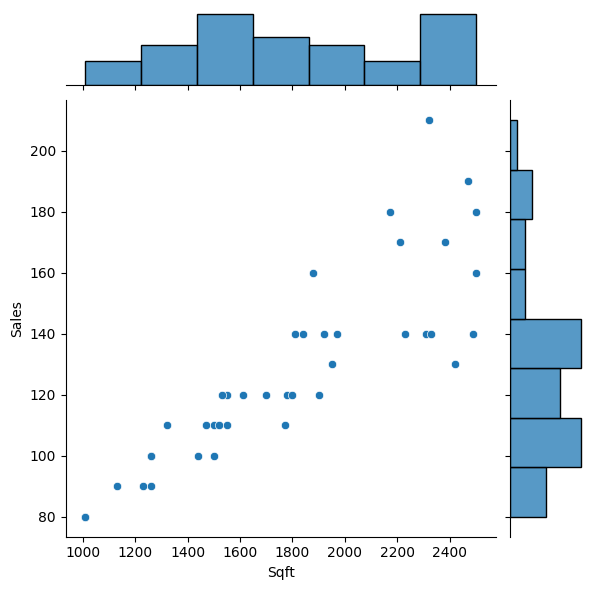

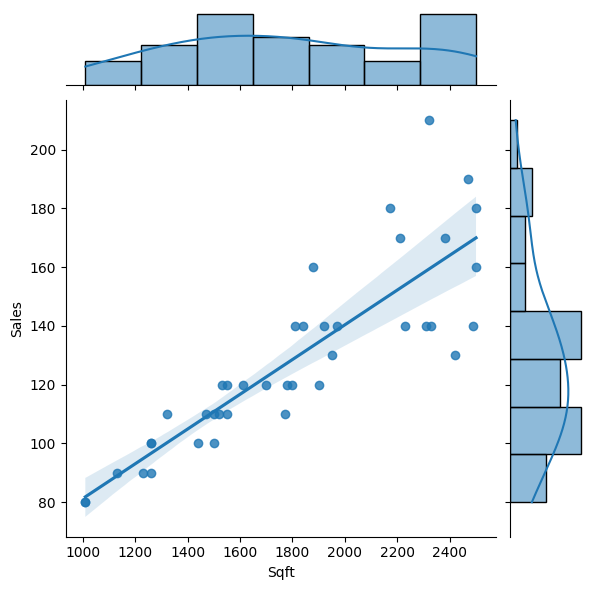

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Sqft', y = 'Sales', data = df)
sns.jointplot(x = 'Sqft', y = 'Sales', kind = 'reg', data = df)
plt.show()

In [ ]:
# 전체 데이터
X = df[['Sqft']]
y = df['Sales']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (40, 1)
y 데이터:  (40,)


In [ ]:
# 단순선형회귀모델
from sklearn.linear_model import LinearRegression
sr = LinearRegression()
# 모델 훈련
sr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
r2 = sr.score(X, y);r2

0.7414667734004174

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = sr.intercept_;intercept

22.07951113028912

In [ ]:
# 기울기
slope = sr.coef_;slope

array([0.0591])

In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept) + " + " + str(slope[0]) + " * Sqft"
equation

'y_hat = 22.07951113028912 + 0.05914790466279158 * Sqft'

In [ ]:
# 결정계수
rsquared = "R squared = " + str(r2)
rsquared

'R squared = 0.7414667734004174'

In [ ]:
y_pred = sr.predict(X)

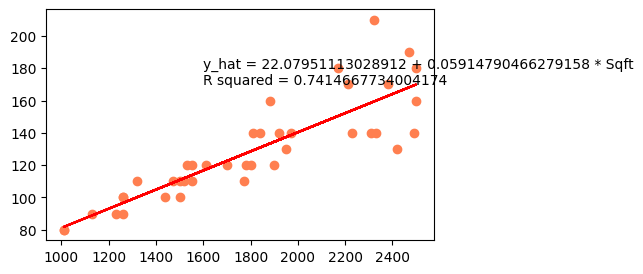

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X, y, 'o', color = 'coral')
plt.plot(X, y_pred, color = 'red')
plt.text(1600, 180, equation)
plt.text(1600, 170, rsquared)
plt.show()

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred, squared = False))
print(mean_absolute_error(y, y_pred))

15.501305615903764
11.198589359595909


In [ ]:
# 잔차도
# 잔차
residuals = y - y_pred;residuals

0     10.862781
1     -9.949273
2     -1.818895
3     29.569536
4    -18.711171
5      9.845255
6      1.083357
7     -0.801368
8     -7.417925
9     -1.818895
10   -16.771302
11     9.088344
12   -19.894129
13   -29.357794
14     6.241237
15   -14.460530
16    50.697350
17    -2.630949
18    10.050727
19     7.148476
20    26.722428
21    -7.362781
22     2.692362
23    -4.831434
24     4.356512
25     3.394129
26    -6.605871
27    21.825164
28   -35.217440
29    -3.758763
30     3.394129
31   -13.979339
32   -10.801368
33     1.399117
34     7.424195
35    -8.545740
36    -1.984326
37    17.203620
38    -7.252494
39     0.973069
Name: Sales, dtype: float64

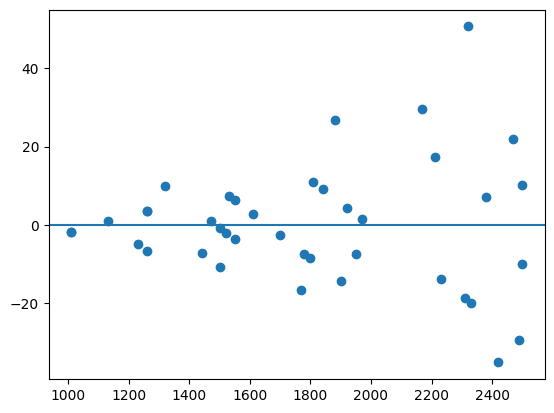

In [ ]:
plt.plot(X, residuals, 'o')
plt.axhline(y = 0)
plt.show()
# Sqft 에 대한 잔차도

In [ ]:
# 로버스트 표준오차 구하기
# 아래 결과에서 나오는 표준오차는 잘못 추정된 결과임 => 로버스트 표준오차로 수정해야 함
import statsmodels.formula.api as smf
model = smf.ols(formula = 'Sales ~ Sqft', data = df)
result = model.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.735   
Dependent Variable: Sales            AIC:                336.7890
Date:               2024-04-17 02:17 BIC:                340.1668
No. Observations:   40               Log-Likelihood:     -166.39 
Df Model:           1                F-statistic:        109.0   
Df Residuals:       38               Prob (F-statistic): 1.02e-12
R-squared:          0.741            Scale:              252.94  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept      22.0795   10.4764   2.1076  0.0417  0.8712  43.2878
Sqft            0.0591    0.0057  10.4395  0.0000  0.0477   0.0706
-----------------------------------------------------------------
Omnibus:              7.975        Durbin-Watson:           2.537
Prob(Omnibus):        0.019        Jarque-Bera (JB):        8.046
Skew:                 0.654        Prob(JB):                0.018
Kurtosis:             4.765        Condition No.:           7703 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 7.7e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [ ]:
# 표준오차 수정해야 함
# 분산–공분산 행렬 - 이분산에서 일관된 분산을 추정해줌
result.cov_HC1

array([[91.4513, -0.061 ],
       [-0.061 ,  0.    ]])

In [ ]:
# 대각선 값 추출 = 분산
np.diag(result.cov_HC1)

array([91.4513,  0.    ])

In [ ]:
# 제곱근(대각선 값) = 표준오차
np.sqrt(np.diag(result.cov_HC1))
# 로버스트 표준오차

array([9.563 , 0.0064])

In [ ]:
result1 = result.get_robustcov_results(cov_type = 'HC1',)
print(result1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.735   
Dependent Variable: Sales            AIC:                336.7890
Date:               2024-04-17 02:24 BIC:                340.1668
No. Observations:   40               Log-Likelihood:     -166.39 
Df Model:           1                F-statistic:        84.31   
Df Residuals:       38               Prob (F-statistic): 3.46e-11
R-squared:          0.741            Scale:              252.94  
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   22.0795     9.5630   2.3088   0.0265   2.7202   41.4388
Sqft         0.0591     0.0064   9.1823   0.0000   0.0461    0.0722
-----------------------------------------------------------------
Omnibus:              7.975        Durbin-Watson:           2.537
Prob(Omnibus):   

## 상관관계를 가지는 관측치들(계열상관)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/restaurant.xlsx', engine = 'openpyxl')
df.head()
# 월, 년, 매출액, 광고비, 실업률

,Month,Year,Sales,AdsCost,Unemp
0,January,2018,27.0,550,4.6
1,February,2018,24.2,425,4.3
2,March,2018,25.6,450,4.6
3,April,2018,28.5,625,4.3
4,May,2018,30.8,650,4.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    17 non-null     object 
 1   Year     17 non-null     int64  
 2   Sales    17 non-null     float64
 3   AdsCost  17 non-null     int64  
 4   Unemp    17 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 808.0+ bytes


In [ ]:
df.columns

Index(['Month', 'Year', 'Sales', 'AdsCost', 'Unemp'], dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:,['AdsCost', 'Unemp']]
y = df['Sales']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (17, 2)
y 데이터:  (17,)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
r2 = mr.score(X, y);r2

0.5558364196804753

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = mr.intercept_;intercept

17.505969929783493

In [ ]:
# 기울기
slope = [round(x, 4) for x in mr.coef_];print(slope)

[0.0266, -0.6879]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

AdsCost: 0.0266
Unemp: -0.6879


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 17.505969929783493 + 0.0266 * AdsCost + -0.6879 * Unemp


In [ ]:
y_pred = mr.predict(X)

In [ ]:
# 잔차도
# 잔차
residuals = y - y_pred;residuals

0    -1.944907
1    -1.632378
2    -0.689797
3    -2.642599
4    -0.662445
5    -0.351077
6     2.660290
7     1.725418
8     2.074170
9     3.544306
10    1.845657
11    0.034478
12   -1.069950
13   -2.922360
14   -0.704633
15   -0.814651
16    1.550477
Name: Sales, dtype: float64

In [ ]:
df

,Month,Year,Sales,AdsCost,Unemp
0,January,2018,27.0,550,4.6
1,February,2018,24.2,425,4.3
2,March,2018,25.6,450,4.6
3,April,2018,28.5,625,4.3
4,May,2018,30.8,650,4.8
5,June,2018,31.5,675,5.2
6,July,2018,34.9,700,5.6
7,August,2018,32.5,650,5.8
8,September,2018,30.4,550,5.5
9,October,2018,31.0,525,5.8


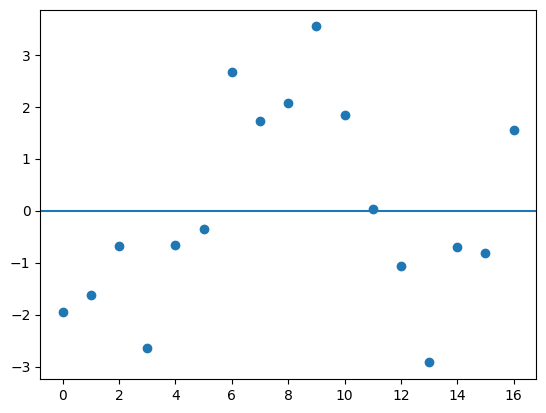

In [ ]:
plt.plot(df.index, residuals, 'o')
plt.axhline(y = 0)
plt.show()
# 시간에 대한 잔차도

In [ ]:
# 로버스트 표준오차 구하기
# 아래 결과에서 나오는 표준오차는 잘못 추정된 결과임 => 로버스트 표준오차로 수정해야 함
import statsmodels.formula.api as smf
model = smf.ols(formula = 'Sales ~ AdsCost + Unemp', data = df)
result = model.fit()
result.summary2()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.492  
Dependent Variable: Sales            AIC:                75.1197
Date:               2024-04-17 04:10 BIC:                77.6193
No. Observations:   17               Log-Likelihood:     -34.560
Df Model:           2                F-statistic:        8.760  
Df Residuals:       14               Prob (F-statistic): 0.00341
R-squared:          0.556            Scale:              4.1460 
-----------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    17.5060    3.9817   4.3966  0.0006   8.9661  26.0458
AdsCost       0.0266    0.0068   3.9323  0.0015   0.0121   0.0410
Unemp        -0.6879    0.2997  -2.2955  0.0377  -1.3306  -0.0452
----------------------------------------------------------------
Omnibus:               1.231       Durbin-Watson:          0.730
Prob(Omnibus):         0.540       Jarque-Bera (JB):       0.910
Skew:                  0.275       Prob(JB):               0.634
Kurtosis:              2.009       Condition No.:          4735 
================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [ ]:
# 표준오차 수정해야 함
# 분산–공분산 행렬 - 이분산과 계열상관에서 일관된 분산을 추정해줌
from statsmodels.stats.sandwich_covariance import cov_hac
cov_hac(result, use_correction=False)

array([[18.1023, -0.0234, -0.5593],
       [-0.0234,  0.    , -0.0001],
       [-0.5593, -0.0001,  0.0904]])

In [ ]:
# 대각선 값 추출 = 분산
np.diag(cov_hac(result, use_correction=False))

array([18.1023,  0.    ,  0.0904])

In [ ]:
# 제곱근(대각선 값) = 표준오차
np.sqrt(np.diag(cov_hac(result, use_correction=False)))
# 로버스트 표준오차

array([4.2547, 0.0064, 0.3006])

In [ ]:
result1 = result.get_robustcov_results(cov_type = 'HAC', maxlags=2)
print(result1.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.492  
Dependent Variable: Sales            AIC:                75.1197
Date:               2024-04-17 04:17 BIC:                77.6193
No. Observations:   17               Log-Likelihood:     -34.560
Df Model:           2                F-statistic:        10.85  
Df Residuals:       14               Prob (F-statistic): 0.00143
R-squared:          0.556            Scale:              4.1460 
-----------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    17.5060    4.2547   4.1145  0.0011   8.3806  26.6314
AdsCost       0.0266    0.0064   4.1686  0.0009   0.0129   0.0402
Unemp        -0.6879    0.3006  -2.2882  0.0382  -1.3326  -0.0431
----------------------------------------------------------------
Omnibus:               1.231       D

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 상호작용

## 더미변수 * 더미변수

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/salary_mis.xlsx', engine = 'openpyxl')
df.head()

,Salary,GPA,MIS,Statistics
0,72,3.53,1,0
1,66,2.86,1,0
2,72,3.69,0,0
3,63,3.24,0,0
4,65,3.21,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Salary      120 non-null    int64  
 1   GPA         120 non-null    float64
 2   MIS         120 non-null    int64  
 3   Statistics  120 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.9 KB


In [ ]:
# 전체 데이터
X = df.loc[:,'GPA':'Statistics']
y = df['Salary']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (120, 3)
y 데이터:  (120,)


In [ ]:
X['MS'] = X['MIS'] * X['Statistics']
X

,GPA,MIS,Statistics,MS
0,3.53,1,0,0
1,2.86,1,0,0
2,3.69,0,0,0
3,3.24,0,0,0
4,3.21,0,0,0
...,...,...,...,...
115,3.27,0,0,0
116,2.86,1,0,0
117,3.04,1,1,1
118,2.99,0,0,0


In [ ]:
X1 = X.iloc[:,[0,1,2]]
X2 = X.iloc[:,[0,1,2,3]]
# X2 = X

In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)

0.7953924097617404
0.8095004820146132


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)

0.7901008341521303
0.8028744118238171


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)

44.00725
44.09933


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)

[6.6227, 6.6071, 6.7309]
[6.7109, 5.325, 5.535, 3.4915]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))

GPA: 6.6227
MIS: 6.6071
Statistics: 6.7309

GPA: 6.7109
MIS: 5.325
Statistics: 5.535
MS: 3.4915


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

y_hat = 44.00725 + 6.6227 * GPA + 6.6071 * MIS + 6.7309 * Statistics
y_hat = 44.09933 + 6.7109 * GPA + 5.325 * MIS + 5.535 * Statistics + 3.4915 * MS


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))

2.970507610145351
2.3336772706234328
2.866267634070082
2.284093548784532


In [ ]:
# 미션
# GPA 가 3.5 이고 MIS만 수강한 사람의 월급 예측값?
# GPA 가 3.5 이고 Statistics만 수강한 사람의 월급 예측값?
# GPA 가 3.5 이고 MIS 와 Statistics 모두 수강한 사람의 월급 예측값?
# 모델 2 를 이용하여 계산해보기
GPA = 3.5; MIS = 1; Statistics = 0; MS = MIS*Statistics
y_hat = 44.09933 + 6.7109 * GPA + 5.325 * MIS + 5.535 * Statistics + 3.4915 * MS
y_hat

72.91248

In [ ]:
GPA = 3.5; MIS = 0; Statistics = 1; MS = MIS*Statistics
y_hat = 44.09933 + 6.7109 * GPA + 5.325 * MIS + 5.535 * Statistics + 3.4915 * MS
y_hat

73.12248

In [ ]:
GPA = 3.5; MIS = 1; Statistics = 1; MS = MIS*Statistics
y_hat = 44.09933 + 6.7109 * GPA + 5.325 * MIS + 5.535 * Statistics + 3.4915 * MS
y_hat

81.93898

## 더미변수 * 수치형변수

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/bp_race.xlsx', engine = 'openpyxl')
df.head()

,Systolic,Weight,Black
0,196,254,1
1,151,148,0
2,180,241,1
3,146,153,1
4,184,244,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Systolic  110 non-null    int64
 1   Weight    110 non-null    int64
 2   Black     110 non-null    int64
dtypes: int64(3)
memory usage: 2.7 KB


In [ ]:
# 전체 데이터
X = df.loc[:,'Weight':'Black']
y = df['Systolic']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (110, 2)
y 데이터:  (110,)


In [ ]:
X['WB'] = X['Weight'] * X['Black']

In [ ]:
X.head()

,Weight,Black,WB
0,254,1,254
1,148,0,0
2,241,1,241
3,153,1,153
4,244,0,0


In [ ]:
X1 = X.iloc[:,[0,1]]
X2 = X.iloc[:,[0,1,2]]

In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)

0.7125882399081953
0.7253065008093416


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)

0.7072160574765728
0.7175321564926248


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)

80.20849
70.83123


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)

[0.3901, 6.9082]
[0.4362, 30.2481, -0.1118]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))

Weight: 0.3901
Black: 6.9082

Weight: 0.4362
Black: 30.2481
WB: -0.1118


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

y_hat = 80.20849 + 0.3901 * Weight + 6.9082 * Black
y_hat = 70.83123 + 0.4362 * Weight + 30.2481 * Black + -0.1118 * WB


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))

9.940814244556035
7.689089150831253
9.718380129690166
7.553872492524616


In [ ]:
# 미션
# 모델 1 를 이용하여 계산해보기
# 체중이  180 이고 인종이 흑인인 사람의 수축기 혈압 예측값?
# 체중이  180 이고 인종이 흑인이 아닌 사람의 수축기 혈압 예측값?
Weight = 180; Black = 1
y_hat = 80.20849 + 0.3901 * Weight + 6.9082 * Black
y_hat

157.33469

In [ ]:
Weight = 180; Black = 0
y_hat = 80.20849 + 0.3901 * Weight + 6.9082 * Black
y_hat

150.42649

In [ ]:
# 모델 2 를 이용하여 계산해보기
# 체중이  180 이고 인종이 흑인인 사람의 수축기 혈압 예측값?
# 체중이  180 이고 인종이 흑인이 아닌 사람의 수축기 혈압 예측값?
Weight = 180; Black = 1; WB = Weight*Black
y_hat = 70.83123 + 0.4362 * Weight + 30.2481 * Black + -0.1118 * WB
y_hat

159.47133

In [ ]:
Weight = 180; Black = 0; WB = Weight*Black
y_hat = 70.83123 + 0.4362 * Weight + 30.2481 * Black + -0.1118 * WB
y_hat

149.34723

## 수치형변수 * 수치형변수

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/marketing_msa.xlsx', engine = 'openpyxl')
df.head()
# 지원자수, 홍보비, 고용률

,Applicants,Marketing,Employed
0,60,173,61
1,71,116,83
2,47,117,63
3,119,226,60
4,66,143,62


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Applicants  80 non-null     int64
 1   Marketing   80 non-null     int64
 2   Employed    80 non-null     int64
dtypes: int64(3)
memory usage: 2.0 KB


In [ ]:
# 전체 데이터
X = df.loc[:,'Marketing':'Employed']
y = df['Applicants']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (80, 2)
y 데이터:  (80,)


In [ ]:
X['ME'] = X['Marketing'] * X['Employed']

In [ ]:
X.head()

,Marketing,Employed,ME
0,173,61,10553
1,116,83,9628
2,117,63,7371
3,226,60,13560
4,143,62,8866


In [ ]:
X1 = X.iloc[:,[0,1]]
X2 = X.iloc[:,[0,1,2]]

In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)

0.7323565151001077
0.7508490632547965


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)

0.725404736271539
0.7410141578569596


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)

-49.54902
-16.63562


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)

[0.355, 1.0149]
[0.0865, 0.5405, 0.0039]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))

Marketing: 0.355
Employed: 1.0149

Marketing: 0.0865
Employed: 0.5405
ME: 0.0039


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

y_hat = -49.54902 + 0.355 * Marketing + 1.0149 * Employed
y_hat = -16.63562 + 0.0865 * Marketing + 0.5405 * Employed + 0.0039 * ME


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))

15.780085783193186
12.483664447231234
15.225174676015422
11.692462081549413


In [ ]:
# 미션
# 모델 1을 이용하여 계산
# 홍보비가 80 (천달러)이고, 고용률이 50%인 경우에 지원자수를 예측하라.
# 홍보비가 80 (천달러)이고, 고용률이 80%인 경우에 지원자수를 예측하라.
Marketing = 80; Employed = 50
y_hat = -49.54902 + 0.355 * Marketing + 1.0149 * Employed
y_hat

29.595979999999997

In [ ]:
Marketing = 80; Employed = 80
y_hat = -49.54902 + 0.355 * Marketing + 1.0149 * Employed
y_hat

60.04297999999999

In [ ]:
# 모델 2를 이용하여 계산
# 홍보비가 80 (천달러)이고, 고용률이 50%인 경우에 지원자수를 예측하라.
# 홍보비가 80 (천달러)이고, 고용률이 80%인 경우에 지원자수를 예측하라.
Marketing = 80; Employed = 50; ME =Marketing*Employed
y_hat = -16.63562 + 0.0865 * Marketing + 0.5405 * Employed + 0.0039 * ME
y_hat

32.90938

In [ ]:
Marketing = 80; Employed = 80; ME =Marketing*Employed
y_hat = -16.63562 + 0.0865 * Marketing + 0.5405 * Employed + 0.0039 * ME
y_hat

58.48437999999999

## 상호작용이 있는 회귀 문제 풀이

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/gender_gap.xlsx', engine = 'openpyxl')
df.head()
# 연봉, 기업 규모, 근무연수, 여성 여부, 대학원학위여부

,Salary,Size,Experience,Female,Grad
0,111,233,11,0,1
1,137,327,18,0,0
2,114,180,16,0,0
3,83,104,20,1,0
4,117,324,15,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Salary      200 non-null    int64
 1   Size        200 non-null    int64
 2   Experience  200 non-null    int64
 3   Female      200 non-null    int64
 4   Grad        200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [ ]:
# 전체 데이터
X = df.loc[:,'Size':'Grad']
y = df['Salary']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (200, 4)
y 데이터:  (200,)


In [ ]:
X['FE'] = X['Female'] * X['Experience']
X['FG'] = X['Female'] * X['Grad']
X['SE'] = X['Size'] * X['Experience']

In [ ]:
X.head()

,Size,Experience,Female,Grad,FE,FG,SE
0,233,11,0,1,0,0,2563
1,327,18,0,0,0,0,5886
2,180,16,0,0,0,0,2880
3,104,20,1,0,20,0,2080
4,324,15,0,1,0,0,4860


In [ ]:
X1 = X.iloc[:,[0,1,2,3,4]]
X2 = X.iloc[:,[0,1,2,3,5]]
X3 = X.iloc[:,[0,1,2,3,6]]
X4 = X.iloc[:,[0,1,2,3,4,5]]
X5 = X.iloc[:,[0,1,2,3,4,6]]
X6 = X.iloc[:,[0,1,2,3,5,6]]
X7 = X.iloc[:,[0,1,2,3,4,5,6]]

In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)
m3 = LinearRegression();m3.fit(X3, y)
m4 = LinearRegression();m4.fit(X4, y)
m5 = LinearRegression();m5.fit(X5, y)
m6 = LinearRegression();m6.fit(X6, y)
m7 = LinearRegression();m7.fit(X7, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)
m3_r2 = m3.score(X3, y);print(m3_r2)
m4_r2 = m4.score(X4, y);print(m4_r2)
m5_r2 = m5.score(X5, y);print(m5_r2)
m6_r2 = m6.score(X6, y);print(m6_r2)
m7_r2 = m7.score(X7, y);print(m7_r2)

0.7282294054673537
0.7223961221766434
0.735064078619974
0.7301641774027232
0.7420670015383072
0.7370233049769075
0.7437107379135317


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)
m3_ar2 = 1 - (1 - m3_r2) * ((len(X) - 1)/(len(X) - X3.shape[1] - 1));print(m3_ar2)
m4_ar2 = 1 - (1 - m4_r2) * ((len(X) - 1)/(len(X) - X4.shape[1] - 1));print(m4_ar2)
m5_ar2 = 1 - (1 - m5_r2) * ((len(X) - 1)/(len(X) - X5.shape[1] - 1));print(m5_ar2)
m6_ar2 = 1 - (1 - m6_r2) * ((len(X) - 1)/(len(X) - X6.shape[1] - 1));print(m6_ar2)
m7_ar2 = 1 - (1 - m7_r2) * ((len(X) - 1)/(len(X) - X7.shape[1] - 1));print(m7_ar2)

0.7212250087010484
0.7152413830574847
0.7282358332235817
0.7217754989800099
0.7340483590990836
0.7288478636808527
0.7343668585666292


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)
intercept3 = round(m3.intercept_, 5);print(intercept3)
intercept4 = round(m4.intercept_, 5);print(intercept4)
intercept5 = round(m5.intercept_, 5);print(intercept5)
intercept6 = round(m6.intercept_, 5);print(intercept6)
intercept7 = round(m7.intercept_, 5);print(intercept7)

1.55914
9.98198
49.05367
2.99415
41.00666
49.86918
41.92978


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)
slope3 = [round(x, 4) for x in m3.coef_];print(slope3)
slope4 = [round(x, 4) for x in m4.coef_];print(slope4)
slope5 = [round(x, 4) for x in m5.coef_];print(slope5)
slope6 = [round(x, 4) for x in m6.coef_];print(slope6)
slope7 = [round(x, 4) for x in m7.coef_];print(slope7)

[0.1137, 4.6294, -0.9654, 16.4645, -1.5324]
[0.1154, 4.0885, -26.2489, 14.6716, 4.9952]
[-0.0473, 1.3534, -23.0911, 16.4116, 0.0111]
[0.1126, 4.5932, -3.6791, 15.104, -1.4976, 4.5685]
[-0.0438, 1.9346, -1.8757, 16.6925, -1.4225, 0.0106]
[-0.0465, 1.3606, -25.3059, 15.0475, 4.5947, 0.0109]
[-0.0432, 1.9286, -4.3688, 15.4357, -1.3915, 4.2128, 0.0105]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X3.columns, slope3):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X4.columns, slope4):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X5.columns, slope5):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X6.columns, slope6):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X7.columns, slope7):
  print("{}: {}".format(name, coef))

Size: 0.1137
Experience: 4.6294
Female: -0.9654
Grad: 16.4645
FE: -1.5324

Size: 0.1154
Experience: 4.0885
Female: -26.2489
Grad: 14.6716
FG: 4.9952

Size: -0.0473
Experience: 1.3534
Female: -23.0911
Grad: 16.4116
SE: 0.0111

Size: 0.1126
Experience: 4.5932
Female: -3.6791
Grad: 15.104
FE: -1.4976
FG: 4.5685

Size: -0.0438
Experience: 1.9346
Female: -1.8757
Grad: 16.6925
FE: -1.4225
SE: 0.0106

Size: -0.0465
Experience: 1.3606
Female: -25.3059
Grad: 15.0475
FG: 4.5947
SE: 0.0109

Size: -0.0432
Experience: 1.9286
Female: -4.3688
Grad: 15.4357
FE: -1.3915
FG: 4.2128
SE: 0.0105


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)

equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

equation3 = "y_hat = " + str(intercept3)
for coef, name in zip(slope3, X3.columns):
  equation3 += " + {} * {}".format(coef, name)
print(equation3)

equation4 = "y_hat = " + str(intercept4)
for coef, name in zip(slope4, X4.columns):
  equation4 += " + {} * {}".format(coef, name)
print(equation4)

equation5 = "y_hat = " + str(intercept5)
for coef, name in zip(slope5, X5.columns):
  equation5 += " + {} * {}".format(coef, name)
print(equation5)

equation6 = "y_hat = " + str(intercept6)
for coef, name in zip(slope6, X6.columns):
  equation6 += " + {} * {}".format(coef, name)
print(equation6)

equation7 = "y_hat = " + str(intercept7)
for coef, name in zip(slope7, X7.columns):
  equation7 += " + {} * {}".format(coef, name)
print(equation7)

y_hat = 1.55914 + 0.1137 * Size + 4.6294 * Experience + -0.9654 * Female + 16.4645 * Grad + -1.5324 * FE
y_hat = 9.98198 + 0.1154 * Size + 4.0885 * Experience + -26.2489 * Female + 14.6716 * Grad + 4.9952 * FG
y_hat = 49.05367 + -0.0473 * Size + 1.3534 * Experience + -23.0911 * Female + 16.4116 * Grad + 0.0111 * SE
y_hat = 2.99415 + 0.1126 * Size + 4.5932 * Experience + -3.6791 * Female + 15.104 * Grad + -1.4976 * FE + 4.5685 * FG
y_hat = 41.00666 + -0.0438 * Size + 1.9346 * Experience + -1.8757 * Female + 16.6925 * Grad + -1.4225 * FE + 0.0106 * SE
y_hat = 49.86918 + -0.0465 * Size + 1.3606 * Experience + -25.3059 * Female + 15.0475 * Grad + 4.5947 * FG + 0.0109 * SE
y_hat = 41.92978 + -0.0432 * Size + 1.9286 * Experience + -4.3688 * Female + 15.4357 * Grad + -1.3915 * FE + 4.2128 * FG + 0.0105 * SE


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)
y_pred3 = m3.predict(X3)
y_pred4 = m4.predict(X4)
y_pred5 = m5.predict(X5)
y_pred6 = m6.predict(X6)
y_pred7 = m7.predict(X7)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print("")
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))
print("")
print(mean_squared_error(y, y_pred3, squared = False))
print(mean_absolute_error(y, y_pred3))
print("")
print(mean_squared_error(y, y_pred4, squared = False))
print(mean_absolute_error(y, y_pred4))
print("")
print(mean_squared_error(y, y_pred5, squared = False))
print(mean_absolute_error(y, y_pred5))
print("")
print(mean_squared_error(y, y_pred6, squared = False))
print(mean_absolute_error(y, y_pred6))
print("")
print(mean_squared_error(y, y_pred7, squared = False))
print(mean_absolute_error(y, y_pred7))

12.18257405767062
9.963515200096236

12.31262328654217
10.045686137240553

12.028410774507503
9.822128830535505

12.139131898620128
9.880597388342988

11.868375580373193
9.700074062363395

11.983852622389493
9.771682378849402

11.830498184393672
9.622294636002549


In [ ]:
df_new = pd.concat([y, X], axis = 1)
df_new

,Salary,Size,Experience,Female,Grad,FE,FG,SE
0,111,233,11,0,1,0,0,2563
1,137,327,18,0,0,0,0,5886
2,114,180,16,0,0,0,0,2880
3,83,104,20,1,0,20,0,2080
4,117,324,15,0,1,0,0,4860
...,...,...,...,...,...,...,...,...
195,42,116,12,1,0,12,0,1392
196,87,142,19,0,0,0,0,2698
197,105,265,14,0,1,0,0,3710
198,108,284,18,0,1,0,0,5112


In [ ]:
import statsmodels.formula.api as smf

model = smf.ols('Salary ~ Size + Experience + Female + Grad + FE + FG + SE', df_new)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     79.59
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.37e-53
Time:                        07:31:59   Log-Likelihood:                -777.92
No. Observations:                 200   AIC:                             1572.
Df Residuals:                     192   BIC:                             1598.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.9298     13.622      3.078      0.0

In [ ]:
# Size          0.388 => 유의하지 않음
# Experience    0.035 => 유의함 => 1.93(천달러) 증가
# Female        0.654 => 유의하지 않음
# Grad          0.000 => 유의함 => 대학원 학위가 있으면 15.44(천달러) 증가
# FE            0.026 => 유의함 => 기울기 -1.3915(천달러) => 경력에 따른 성별의 연봉 차이가 있음
# FG            0.269 => 유의하지 않음
# SE             0.002 => 유의함 => 0.0105(천달러) => 상대적으로 규모가 큰 기업이면 근무연수가 1년 증가할 때 이만큼 연봉의 차이가 있음

In [ ]:
# 대학원 학위를 받은 남성(다른 조건 동일)
Size = df_new['Size'].mean(); Experience = pd.Series(range(21)); Female = 0; Grad = 1; FE = Female*Experience; FG = Female*Grad; SE = Size*Experience
y_hat1 = 41.92978 + -0.0432 * Size + 1.9286 * Experience + -4.3688 * Female + 15.4357 * Grad + -1.3915 * FE + 4.2128 * FG + 0.0105 * SE
# 대학원 학위를 받은 여성(다른 조건 동일)
Size = df_new['Size'].mean(); Experience = pd.Series(range(21)); Female = 1; Grad = 1; FE = Female*Experience; FG = Female*Grad; SE = Size*Experience
y_hat2 = 41.92978 + -0.0432 * Size + 1.9286 * Experience + -4.3688 * Female + 15.4357 * Grad + -1.3915 * FE + 4.2128 * FG + 0.0105 * SE

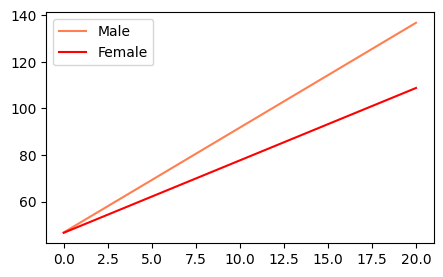

In [ ]:
plt.figure(figsize = (5, 3))
plt.plot(Experience, y_hat1, color = 'coral')
plt.plot(Experience, y_hat2, color = 'red')
plt.legend(['Male', 'Female'])
plt.show()

In [ ]:
# 400명의 기업 규모에서 근무하는 대학원 학위를 받은 남성(다른 조건 동일)
Size = 400; Experience = pd.Series(range(21)); Female = 0; Grad = 1; FE = Female*Experience; FG = Female*Grad; SE = Size*Experience
y_hat1 = 41.92978 + -0.0432 * Size + 1.9286 * Experience + -4.3688 * Female + 15.4357 * Grad + -1.3915 * FE + 4.2128 * FG + 0.0105 * SE
# 200명의 기업 규모에서 근무하는 대학원 학위를 받은 남성(다른 조건 동일)
Size = 200; Experience = pd.Series(range(21)); Female = 0; Grad = 1; FE = Female*Experience; FG = Female*Grad; SE = Size*Experience
y_hat2 = 41.92978 + -0.0432 * Size + 1.9286 * Experience + -4.3688 * Female + 15.4357 * Grad + -1.3915 * FE + 4.2128 * FG + 0.0105 * SE

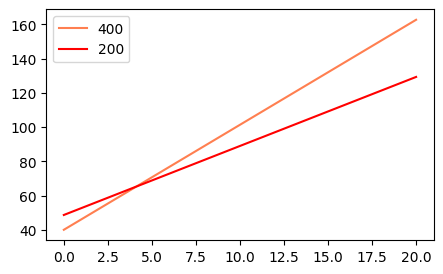

In [ ]:
plt.figure(figsize = (5, 3))
plt.plot(Experience, y_hat1, color = 'coral')
plt.plot(Experience, y_hat2, color = 'red')
plt.legend(['400', '200'])
plt.show()